# Emoji Sentiment Analysis with Tweets
        
## step3-EDA & Basic models
### 3.1 data exploring
1. plot the most requent emoji

### 3.2 topic models
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)


In [1]:
# ! git clone https://github.com/Liagogo/Twitter-Sentiment-Analysis-Emoji-Embedding-and-LSTM

In [2]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [3]:
# emoji lists

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojilist = {'joy':joy, 'anger':anger, 'disgust':disgust, 'fear':fear, 'sad':sad, 'surprise':surp}
for i in emojilist:
    print('There are {} emoji contains in the cluster {}'.format(len(emojilist[i]), i))
    print(i,emojilist[i])

There are 29 emoji contains in the cluster joy
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥']
There are 9 emoji contains in the cluster anger
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
There are 1 emoji contains in the cluster disgust
disgust ['💩']
There are 7 emoji contains in the cluster fear
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
There are 12 emoji contains in the cluster sad
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
There are 4 emoji contains in the cluster surprise
surprise ['😳', '😯', '😵', '😲']


In [4]:
allemoji = allemoji = joy + anger + disgust + fear + sad + surp

In [5]:
##########
#3.1 Cleaned Data Exploring
#load the cleaned data
df = pd.read_csv('tweets_cleaned_drop.csv')

In [6]:
df[['tweets','stweets','emojis','c_emojis','type']]

,tweets,stweets,emojis,c_emojis,type
0,four goal for 😱,four goal for 😱,😱,😱,fear
1,kitten best spot 😅,kitten best spot 😅,😅,😅,fear
2,🙀 when cleaning window remember,🙀 when cleaning window remember,🙀,🙀,fear
3,diamond dragon field day making fun 😅,diamond dragon field day making fun 😅,😅,😅,fear
4,😅,😅,😅,😅,fear
...,...,...,...,...,...
105640,remember mother wrote reason lovely 😭,remember mother wrote reason lovely 😭,😭,😭,sad
105641,can skip finally happy rich 😩,can skip finally happy rich 😩,😩,😩,sad
105642,i hate relapsing 😔,i hate relapsing 😔,😔,😔,sad
105643,volunteer tandem raise ur hand need eme 😭,volunteer tandem raise ur hand need eme 😭,😭,😭,sad


In [7]:
#### all emojis frequencies
#get the emoji list
wordslist = []
for t in df['emojis']:
    t = t.split()
    wordslist += t

wordslist[:3]

['😱', '😅', '🙀']

In [8]:
ls = []
count = Counter(wordslist)
allemoji = joy + anger + disgust + fear + sad + surp
for i in allemoji:
    x,y = i,count[i]
    ls.append([x,y])
# x,y = zip(*ls)
# x,y

ls = sorted(ls)
import pandas as pd
fredf = pd.DataFrame(ls,columns=['emoji','count'])
fredf.sort_values(by=['count'],ascending=False, inplace=True)
fredf[:11]

,emoji,count
14,😅,13365
38,😤,8409
52,😳,8021
11,😂,7565
8,💩,5631
46,😬,5122
50,😱,4703
47,😭,4577
24,😐,4032
21,😍,3502


In [9]:
fredf.to_csv('fre_emojis_en.csv')

findfont: Font family ['Euclid Fraktur'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128548 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/

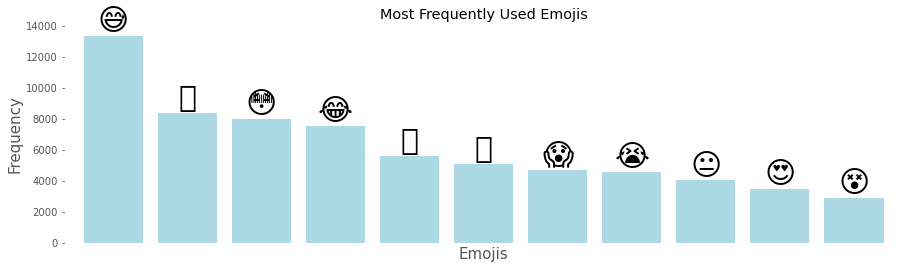

In [10]:
# draw the most frequently used emoji:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/Library/Fonts/Euclid Fraktur.dfont')

freqs = fredf['count'][:11]
labels = fredf['emoji'][:11]
# Plot the figure
plt.figure(figsize=(15, 4))
plt.rcParams['font.family'] = prop.get_family()
# plt.grid(axis = 'x')
# plt.bar(labels,freqs,color='pink')
# plt.show()


ax = pd.Series(freqs).plot(kind='bar', color='lightblue', width=0.8)
ax.set_title('Most Frequently Used Emojis')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
ax.set_facecolor(color='white')
ax.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop.get_name()
    )

plt.show()

In [11]:
### solve the emoji presenting problem in mathplotlib
# refer to https://github.com/matplotlib/mplcairo#installation
# and https://towardsdatascience.com/how-i-got-matplotlib-to-plot-apple-color-emojis-c983767b39e0
# ! git clone https://github.com/matplotlib/mplcairo.git

In [12]:
# ! brew install llvm

In [13]:
# ! brew install cairo

In [14]:
# ! pip install pycairo

In [15]:
# ! brew info llvm

## 3.2 Topic model
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

In [44]:
######################
##########
# 3.2 Topic model with emojis
# prepare emoji list for topic model
emlist = [em.split() for em in df['emojis']]
emlist[:10]

[['😱'],
 ['😅'],
 ['🙀'],
 ['😅'],
 ['😅'],
 ['😅'],
 ['😱'],
 ['😮', '😮'],
 ['💙', '❤', '😅'],
 ['😅']]

In [49]:
# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=9)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 6.55 s, sys: 24.9 ms, total: 6.58 s
Wall time: 6.61 s
[(0, '0.719*"😑" + 0.079*"😔" + 0.054*"😏" + 0.031*"😦" + 0.029*"🙂" + 0.017*"😧" + 0.005*"🏕" + 0.005*"😿" + 0.005*"👈" + 0.005*"🏚"'), (1, '0.690*"😅" + 0.060*"🥰" + 0.046*"👋" + 0.045*"😘" + 0.032*"💘" + 0.015*"🔗" + 0.010*"🌞" + 0.009*"🤧" + 0.007*"🟥" + 0.007*"⬛"'), (2, '0.472*"😯" + 0.203*"😖" + 0.047*"🏆" + 0.027*"👑" + 0.021*"↗" + 0.020*"💰" + 0.019*"🛒" + 0.018*"💵" + 0.017*"✔" + 0.017*"⏲"'), (3, '0.365*"😬" + 0.219*"😭" + 0.191*"😠" + 0.088*"😲" + 0.083*"😂" + 0.008*"😢" + 0.006*"😕" + 0.006*"♥" + 0.003*"🤯" + 0.003*"🤗"'), (4, '0.722*"😤" + 0.069*"😱" + 0.028*"⛏" + 0.021*"➡" + 0.021*"👇" + 0.016*"👧" + 0.015*"🚨" + 0.012*"💟" + 0.009*"✨" + 0.009*"😇"'), (5, '0.351*"😡" + 0.077*"😍" + 0.058*"❤" + 0.056*"🥺" + 0.053*"🔥" + 0.052*"🤨" + 0.041*"😊" + 0.038*"🏽" + 0.032*"😁" + 0.029*"😎"'), (6, '0.125*"🏻" + 0.117*"😩" + 0.074*"😆" + 0.057*"💖" + 0.052*"🤓" + 0.043*"🙀" + 0.042*"😌" + 0.037*"😜" + 0.030*"🤏" + 0.029*"❌"'), (7, '0.607*"😳" + 0.319*"😐" + 0.022*"💯" + 0.017*

In [50]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: user 3.49 s, sys: 27.6 ms, total: 3.52 s
Wall time: 3.75 s


In [52]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(9):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])

Top 10 related emoji in Topic_0
['😑', '😔', '😏', '😦', '🙂', '😧', '🏕', '😿', '👈', '🏚']
Top 10 related emoji in Topic_1
['😅', '🥰', '👋', '😘', '💘', '🔗', '🌞', '🤧', '🟥', '⬛']
Top 10 related emoji in Topic_2
['😯', '😖', '🏆', '👑', '↗', '💰', '🛒', '💵', '✔', '⏲']
Top 10 related emoji in Topic_3
['😬', '😭', '😠', '😲', '😂', '😢', '😕', '♥', '🤯', '🤗']
Top 10 related emoji in Topic_4
['😤', '😱', '⛏', '➡', '👇', '👧', '🚨', '💟', '✨', '😇']
Top 10 related emoji in Topic_5
['😡', '😍', '❤', '🥺', '🔥', '🤨', '😊', '🏽', '😁', '😎']
Top 10 related emoji in Topic_6
['🏻', '😩', '😆', '💖', '🤓', '🙀', '😌', '😜', '🤏', '❌']
Top 10 related emoji in Topic_7
['😳', '😐', '💯', '🤔', '😉', '🥵', '🔟', '💀', '🎯', '👎']
Top 10 related emoji in Topic_8
['😵', '💫', '💔', '😾', '👀', '💩', '💕', '🐂', '😈', '🙏']


In [19]:
###
#only explore our concerned emojis

In [95]:
# prepare emoji list for topic model
cels = []
emlist = [em.split() for em in df['emojis']]
for i in emlist:
    e = []
    for emo in i:
        if emo in allemoji:
            e.append(emo)
    cels.append(e)
        
print(emlist[:10])
print(cels[:10])

[['😱'], ['😅'], ['🙀'], ['😅'], ['😅'], ['😅'], ['😱'], ['😮', '😮'], ['💙', '❤', '😅'], ['😅']]
[['😱'], ['😅'], ['🙀'], ['😅'], ['😅'], ['😅'], ['😱'], [], ['❤', '😅'], ['😅']]


In [96]:
emlist = cels

In [40]:

# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=6)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 6.29 s, sys: 24.1 ms, total: 6.32 s
Wall time: 6.34 s
[(0, '0.488*"😤" + 0.195*"😐" + 0.133*"😠" + 0.122*"😡" + 0.027*"😍" + 0.015*"😾" + 0.014*"😊" + 0.001*"😹" + 0.001*"😝" + 0.001*"😿"'), (1, '0.748*"😅" + 0.082*"😔" + 0.078*"💕" + 0.049*"😘" + 0.027*"😰" + 0.014*"😓" + 0.000*"😱" + 0.000*"😪" + 0.000*"😿" + 0.000*"😩"'), (2, '0.387*"😯" + 0.224*"😑" + 0.167*"😖" + 0.049*"💔" + 0.045*"❤" + 0.022*"😆" + 0.017*"😪" + 0.017*"😏" + 0.016*"💖" + 0.012*"😌"'), (3, '0.450*"😲" + 0.342*"😱" + 0.091*"💩" + 0.042*"😢" + 0.030*"♥" + 0.025*"😨" + 0.010*"☺" + 0.009*"😼" + 0.000*"☹" + 0.000*"😻"'), (4, '0.597*"😬" + 0.274*"😵" + 0.026*"😁" + 0.024*"😎" + 0.021*"😉" + 0.015*"😇" + 0.013*"😋" + 0.010*"😕" + 0.010*"😦" + 0.006*"😧"'), (5, '0.608*"😳" + 0.250*"😭" + 0.094*"😂" + 0.025*"😩" + 0.009*"🙀" + 0.007*"😫" + 0.005*"😀" + 0.001*"😺" + 0.000*"☹" + 0.000*"😔"')]
[(0, 0.083333366), (1, 0.083333366), (2, 0.083333366), (3, 0.58333313), (4, 0.083333366), (5, 0.083333366)]


In [41]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: user 3.44 s, sys: 76.7 ms, total: 3.52 s
Wall time: 7.08 s


In [43]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(6):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])

Top 10 related emoji in Topic_0
['😤', '😐', '😠', '😡', '😍', '😾', '😊', '😹', '😝', '😿']
Top 10 related emoji in Topic_1
['😅', '😔', '💕', '😘', '😰', '😓', '😱', '😪', '😿', '😩']
Top 10 related emoji in Topic_2
['😯', '😑', '😖', '💔', '❤', '😆', '😪', '😏', '💖', '😌']
Top 10 related emoji in Topic_3
['😲', '😱', '💩', '😢', '♥', '😨', '☺', '😼', '☹', '😻']
Top 10 related emoji in Topic_4
['😬', '😵', '😁', '😎', '😉', '😇', '😋', '😕', '😦', '😧']
Top 10 related emoji in Topic_5
['😳', '😭', '😂', '😩', '🙀', '😫', '😀', '😺', '☹', '😔']


In [232]:
# e-LDA
# select stable topics
from gensim.models import EnsembleLda
emlist = cels
# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

# Ensemble LDA model
elda = EnsembleLda(corpus=corpus, id2word=vocabs, num_topics=12, num_models=3)

In [233]:
elda.print_topics()

[(0,
  '0.767*"😅" + 0.020*"😵" + 0.020*"💩" + 0.019*"😭" + 0.018*"💖" + 0.018*"😧" + 0.017*"😐" + 0.013*"😊" + 0.013*"😤" + 0.011*"😍"'),
 (1,
  '0.769*"😤" + 0.043*"😂" + 0.037*"😩" + 0.034*"😱" + 0.033*"😭" + 0.018*"🌞" + 0.012*"😅" + 0.007*"😵" + 0.004*"😖" + 0.004*"😢"'),
 (2,
  '0.558*"😭" + 0.091*"😃" + 0.074*"😰" + 0.058*"😁" + 0.035*"😲" + 0.029*"😅" + 0.028*"😂" + 0.020*"😪" + 0.020*"😦" + 0.016*"😧"'),
 (3,
  '0.545*"😳" + 0.133*"😐" + 0.073*"😑" + 0.072*"😠" + 0.038*"😎" + 0.021*"😆" + 0.020*"😱" + 0.019*"💔" + 0.015*"😀" + 0.011*"😭"')]

In [234]:
import re
k = 1
for i,j in elda.print_topics():
    x = re.findall(r'"(.*?)"', str(j))
    z = ' '.join(x)
    print('Topic{}'.format(k),z)
    k += 1

Topic1 😅 😵 💩 😭 💖 😧 😐 😊 😤 😍
Topic2 😤 😂 😩 😱 😭 🌞 😅 😵 😖 😢
Topic3 😭 😃 😰 😁 😲 😅 😂 😪 😦 😧
Topic4 😳 😐 😑 😠 😎 😆 😱 💔 😀 😭


### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

#### 3.3.1 Word embedding model with only emojis

(1) All emojis

In [201]:
# 3.3.1 
####
# all emojis
emlist = [em.split() for em in df['emojis']]
emlist[:3]

[['😱'], ['😅'], ['🙀']]

In [113]:
posit = (['😂', '😅'],['😅', '👍'],['🙃', '😅'],['💩', '😡'],['😀','👏'],['🎉','😆'],['😘', '♥'])
negat = (['😅', '👍'],['💋', '♥'],['😘', '♥'])

In [202]:
from gensim.models import Word2Vec
# set model parameters
num_features = 12    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count                     
context = 5           # Context window size 
sg = 1                # skipgram=1, cbow=0  ###试过了，cbow表现不太好

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 637 ms, sys: 12.1 ms, total: 649 ms
Wall time: 531 ms


In [203]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i))
    print('\n')

the most similar words to 😀 are:
[('🤗', 0.9762192964553833), ('📲', 0.9737145304679871), ('⚛', 0.9733138680458069), ('😯', 0.9723382592201233), ('🍻', 0.9718808531761169), ('🧹', 0.9699539542198181), ('💌', 0.9676825404167175), ('💧', 0.9676713943481445), ('🔛', 0.9672349095344543), ('😞', 0.9671096801757812)]


the most similar words to 😂 are:
[('\U0001f979', 0.9652882218360901), ('😖', 0.9109697937965393), ('🤭', 0.9042365550994873), ('\U0001fae3', 0.8894174695014954), ('🥶', 0.8847780227661133), ('☹', 0.8822500109672546), ('🤧', 0.8816503286361694), ('🤩', 0.8792203068733215), ('🌕', 0.8723275661468506), ('👤', 0.866602897644043)]


the most similar words to 😃 are:
[('😏', 0.9580017924308777), ('😔', 0.9565173983573914), ('💭', 0.95444256067276), ('🏃', 0.952777624130249), ('💞', 0.9523217082023621), ('🌕', 0.9509680867195129), ('🕰', 0.9507456421852112), ('😯', 0.9486527442932129), ('😎', 0.945946991443634), ('📲', 0.9459121823310852)]


the most similar words to 😄 are:
[('🐝', 0.957086443901062), ('🤲', 0.9

In [204]:
# have fun
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[:3])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('😖', 0.9038373231887817), ('😇', 0.8927968740463257), ('🤭', 0.8921403884887695)]

😅+👍=?
[('🙂', 0.9226072430610657), ('🤯', 0.900079071521759), ('😖', 0.897757887840271)]

🙃+😅=?
[('🤯', 0.9113821387290955), ('😖', 0.9088395237922668), ('🤭', 0.9009666442871094)]

💩+😡=?
[('🤏', 0.8689396381378174), ('🧼', 0.8308162093162537), ('😽', 0.8276216983795166)]

😀+👏=?
[('📲', 0.9700115323066711), ('✊', 0.9674271941184998), ('😑', 0.9634210467338562)]

🎉+😆=?
[('🔃', 0.9358394145965576), ('\U0001fac2', 0.9036098718643188), ('💓', 0.9005451202392578)]

😘+♥=?
[('🌊', 0.9389241337776184), ('💖', 0.9164095520973206), ('📌', 0.9048768281936646)]

😅-👍=?
[('🌓', -0.16123655438423157), ('👀', -0.18293136358261108), ('😡', -0.22438251972198486)]

💋-♥=?
[('📧', -0.10990339517593384), ('😒', -0.1755211055278778), ('🤷', -0.18601399660110474)]

😘-♥=?
[('😒', -0.06801200658082962), ('📧', -0.10810776054859161), ('🤷', -0.12530574202537537)]



In [236]:
# only print answers
for i in posit:
    print(model_emoall.wv.most_similar(positive=i)[0][0])
    print()
print('----')
for i in negat:
    print(model_emoall.wv.most_similar(negative=i)[0][0])
    print()

😖

🙂

🤯

🤏

📲

🔃

🌊

----
🌓

📧

😒



***(2) only concerned emojis***

In [289]:
#####
# only concerned emojis
emlist2 = cels

In [298]:

from gensim.models import Word2Vec
# set model parameters
num_features = 10    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count                     
context = 10           # Context window size 
sg = 1                # skipgram=1, cbow=0  


# train the model
%time model_emo = Word2Vec(emlist2, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 479 ms, sys: 10.4 ms, total: 489 ms
Wall time: 479 ms


In [300]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emo.wv.most_similar(i)[:3])
    print('\n')

the most similar words to 😀 are:
[('😏', 0.9875468015670776), ('😖', 0.9871406555175781), ('😍', 0.9862051606178284)]


the most similar words to 😂 are:
[('😫', 0.9902285933494568), ('😖', 0.9853331446647644), ('😻', 0.9829540252685547)]


the most similar words to 😃 are:
[('😔', 0.9843364357948303), ('❤', 0.9818063974380493), ('😉', 0.980373740196228)]


the most similar words to 😄 are:
[('🙀', 0.9924232363700867), ('😵', 0.9912937879562378), ('😫', 0.9908487200737)]


the most similar words to 😆 are:
[('😪', 0.9967268705368042), ('💔', 0.9961419105529785), ('😘', 0.993301272392273)]


the most similar words to 😇 are:
[('😰', 0.9840161800384521), ('😍', 0.9754431843757629), ('😬', 0.9742489457130432)]


the most similar words to 😉 are:
[('😔', 0.9895260334014893), ('😍', 0.9817255139350891), ('😡', 0.980783224105835)]


the most similar words to 😊 are:
[('😢', 0.9884390234947205), ('😌', 0.9835110306739807), ('❤', 0.9831910729408264)]


the most similar words to 😋 are:
[('😪', 0.9887210726737976), ('😆', 0.9

In [213]:
# have fun
# not very satisfying
for i in (['😂', '😅'],['😅', '💖'],['😠', '😅'],['😘', '💔'],['😘', '♥']):
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emo.wv.most_similar(positive=i)[:3])
    print()

for i in (['😅', '😡'],['😍', '💖']):
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emo.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('😫', 0.9933727979660034), ('😻', 0.9914705753326416), ('😄', 0.989077091217041)]

😅+💖=?
[('😜', 0.9946421980857849), ('😄', 0.990865170955658), ('😨', 0.9898872971534729)]

😠+😅=?
[('😢', 0.9917558431625366), ('😊', 0.9866514205932617), ('😜', 0.9843887090682983)]

😘+💔=?
[('😆', 0.9958699345588684), ('😱', 0.9930557608604431), ('😪', 0.9921881556510925)]

😘+♥=?
[('☺', 0.9943860769271851), ('🙀', 0.9906758069992065), ('😱', 0.9905045032501221)]

😅-😡=?
[('😦', -0.599183976650238), ('😧', -0.8372169733047485), ('😭', -0.8792012929916382)]

😍-💖=?
[('😦', -0.49468234181404114), ('😿', -0.8722545504570007), ('😧', -0.8866218328475952)]



***(3). emojis+text***

In [31]:
##################
# 3.3.2 Word embedding model with emojis&text

In [214]:
# emojis+tweets
emlist = [em.split() for em in df['stweets']]
emlist[:3]

[['four', 'goal', 'for', '😱'],
 ['kitten', 'best', 'spot', '😅'],
 ['🙀', 'when', 'cleaning', 'window', 'remember']]

In [215]:
from gensim.models import Word2Vec
# set model parameters
num_features = 200    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count-Ignores all words with total frequency lower than this                     
context = 10           # Context window size 
sg = 3                # skipgram=3, cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)
# this set of parameters is good

CPU times: user 13.5 s, sys: 49.7 ms, total: 13.6 s
Wall time: 4.81 s


In [216]:

list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i))
    print('\n')

the most similar words to 😀 are:
[('🕊', 0.6055445671081543), ('😃', 0.5946354269981384), ('cheer', 0.5668410062789917), ('pup', 0.516869843006134), ('client', 0.5103661417961121), ('🦅', 0.5069097876548767), ('exam', 0.5012890696525574), ('riley', 0.4999629855155945), ('lee', 0.4993319511413574), ('pax', 0.4943578839302063)]


the most similar words to 😂 are:
[('😹', 0.5893123149871826), ('stole', 0.505918562412262), ('😑', 0.5008179545402527), ('politician', 0.4967842400074005), ('retire', 0.49357476830482483), ('specie', 0.4916939437389374), ('😨', 0.48740458488464355), ('cheat', 0.4857381582260132), ('😧', 0.4836587607860565), ('naw', 0.47950708866119385)]


the most similar words to 😃 are:
[('gunner', 0.6814182996749878), ('springer', 0.6642818450927734), ('leading', 0.6114386916160583), ('😀', 0.5946354269981384), ('🦅', 0.5929374098777771), ('senior', 0.5831424593925476), ('wishing', 0.5785650014877319), ('weekend', 0.5783368349075317), ('any', 0.5683812499046326), ('literal', 0.55650240

In [217]:
# have fun
# not very satisfying
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i)[:3])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i)[:3])
    print()

😂+😅=?
[('😹', 0.567802369594574), ('habit', 0.5473423004150391), ('villain', 0.5465942621231079)]

😅+👍=?
[('grinding', 0.6163204312324524), ('relief', 0.611219048500061), ('🍻', 0.6110185980796814)]

🙃+😅=?
[('diet', 0.6856566667556763), ('washing', 0.6767232418060303), ('monitor', 0.6764207482337952)]

💩+😡=?
[('crap', 0.5788143277168274), ('idiot', 0.5532700419425964), ('🤥', 0.5525790452957153)]

😀+👏=?
[('🏟', 0.6628801226615906), ('🤞', 0.6508917808532715), ('achievement', 0.6440207958221436)]

🎉+😆=?
[('🎊', 0.6366484761238098), ('eligible', 0.6359479427337646), ('rusty', 0.6333608031272888)]

😘+♥=?
[('honey', 0.6959444880485535), ('darling', 0.6825088858604431), ('💓', 0.6772529482841492)]

😅-👍=?
[('pick', -0.035912103950977325), ('foot', -0.06955716013908386), ('how', -0.07168828696012497)]

💋-♥=?
[('city', 0.00942663848400116), ('elevator', -0.0025020772591233253), ('level', -0.003983624745160341)]

😘-♥=?
[('city', 0.04808654263615608), ('fail', 0.04707762226462364), ('level', 0.04688363

In [225]:
####
## cbow
# cbow 在英文效果不是很好
from gensim.models import Word2Vec
# set model parameters
num_features = 200    # Word vector dimensionality                  
min_word_count = 50    # Minimum word count-Ignores all words with total frequency lower than this                     
context = 20           # Context window size 
sg = 0                # skipgram=3, cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 4.84 s, sys: 39.2 ms, total: 4.88 s
Wall time: 1.84 s


In [223]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i))
    print('\n')


the most similar words to 😀 are:
[('😁', 0.8230410814285278), ('😄', 0.7999712824821472), ('😃', 0.7953985929489136), ('😊', 0.7923083305358887), ('😉', 0.750678539276123), ('😌', 0.7272717952728271), ('😅', 0.6959548592567444), ('😎', 0.6731786131858826), ('😰', 0.6606834530830383), ('😔', 0.6338298320770264)]


the most similar words to 😂 are:
[('😹', 0.7144021987915039), ('😑', 0.6984091401100159), ('😅', 0.694434404373169), ('😐', 0.6730599403381348), ('😬', 0.6533709764480591), ('😀', 0.6328097581863403), ('😌', 0.612389087677002), ('😤', 0.6042237281799316), ('😨', 0.5981648564338684), ('😖', 0.5809630751609802)]


the most similar words to 😃 are:
[('😀', 0.7953985929489136), ('🌞', 0.7773857712745667), ('😊', 0.756960928440094), ('😁', 0.7503799200057983), ('weekend', 0.7158496379852295), ('😄', 0.689711332321167), ('have', 0.6721858978271484), ('enjoy', 0.6460749506950378), ('😸', 0.6369124054908752), ('gunner', 0.6360430121421814)]


the most similar words to 😄 are:
[('😀', 0.7999712824821472), ('😁', 0.

KeyError: "Key '😺' not present"

In [224]:
# have fun
# not very satisfying
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i))
    print()

😂+😅=?
[('😑', 0.7680839896202087), ('😐', 0.7564716339111328), ('😬', 0.7401806116104126), ('😀', 0.7218063473701477), ('😌', 0.7166162133216858), ('😹', 0.7121845483779907), ('😩', 0.6981898546218872), ('😨', 0.6938329935073853), ('😧', 0.6937025785446167), ('😖', 0.6745899319648743)]

😅+👍=?
[('😀', 0.7650981545448303), ('😁', 0.7430753707885742), ('😊', 0.7133368253707886), ('😃', 0.710479736328125), ('😌', 0.6929183006286621), ('🌞', 0.6708278656005859), ('😄', 0.6433161497116089), ('😎', 0.6200792193412781), ('😔', 0.607010543346405), ('😉', 0.5795019268989563)]

🙃+😅=?
[('blood', 0.7249199151992798), ('normal', 0.7017295360565186), ('instead', 0.6972572207450867), ('honestly', 0.6853029727935791), ('drama', 0.6669531464576721), ('meant', 0.6604941487312317), ('😩', 0.6594782471656799), ('even', 0.657600462436676), ('based', 0.6557599306106567), ('text', 0.6535236239433289)]

💩+😡=?
[('😑', 0.689010500907898), ('😳', 0.5904901027679443), ('😤', 0.590411901473999), ('😐', 0.5774555802345276), ('🙄', 0.57230091

***emojis+text Visualization***

In [286]:
# visualization
# keys = ['😀','🤣','😘','😡','😂','😅']
keys = allemoji
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    try:
        for similar_word, _ in model_emotext.wv.most_similar(word, topn=10):
            words.append(similar_word)
            embeddings.append(model_emotext.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except:
        continue


In [287]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

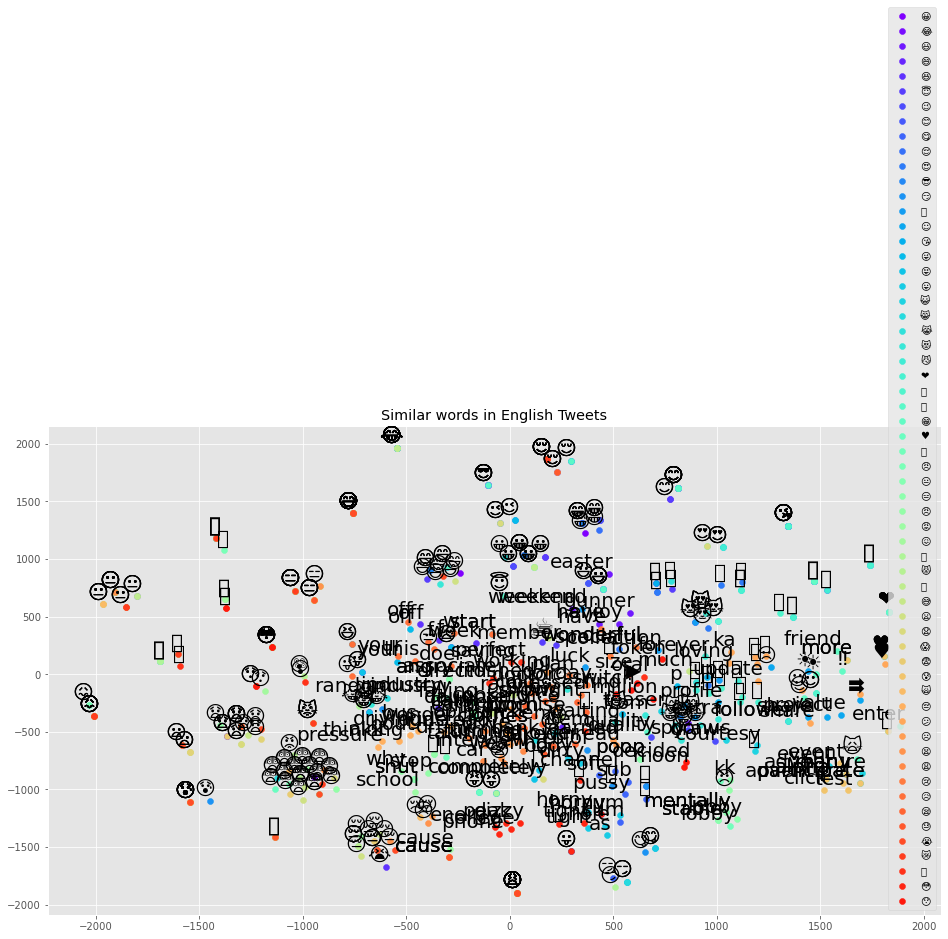

In [288]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#ignore the warning

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=1, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=20)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words in English Tweets', keys, embeddings_en_2d, word_clusters, 1,
                        'similar_words.png')